In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
%matplotlib inline

In [32]:
df_train = pd.read_csv("../data/train_new.csv")
df_test = pd.read_csv("../data/test_new.csv")

/home/ubuntu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### 모든 컬럼에 NaN 값이 없는 것만 활용

In [33]:
df_train.shape, df_train.dropna().shape

((213451, 29), (41567, 29))

In [34]:
df_train_no_nan = df_train.dropna()

In [35]:
y = df_train_no_nan["country_destination"]
X = df_train_no_nan.drop(["id", "country_destination"], axis = 1)

In [36]:
y.shape, X.shape, df_train_no_nan.shape

((41567,), (41567, 27), (41567, 29))

In [37]:
X = pd.get_dummies(X)

In [38]:
X.shape

(41567, 347)

In [39]:
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### 1. 12 class(NDF, other, 10개 나라 )

In [40]:
xgb1 = XGBClassifier(n_jobs = 4)

In [41]:
xgb1.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=4, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

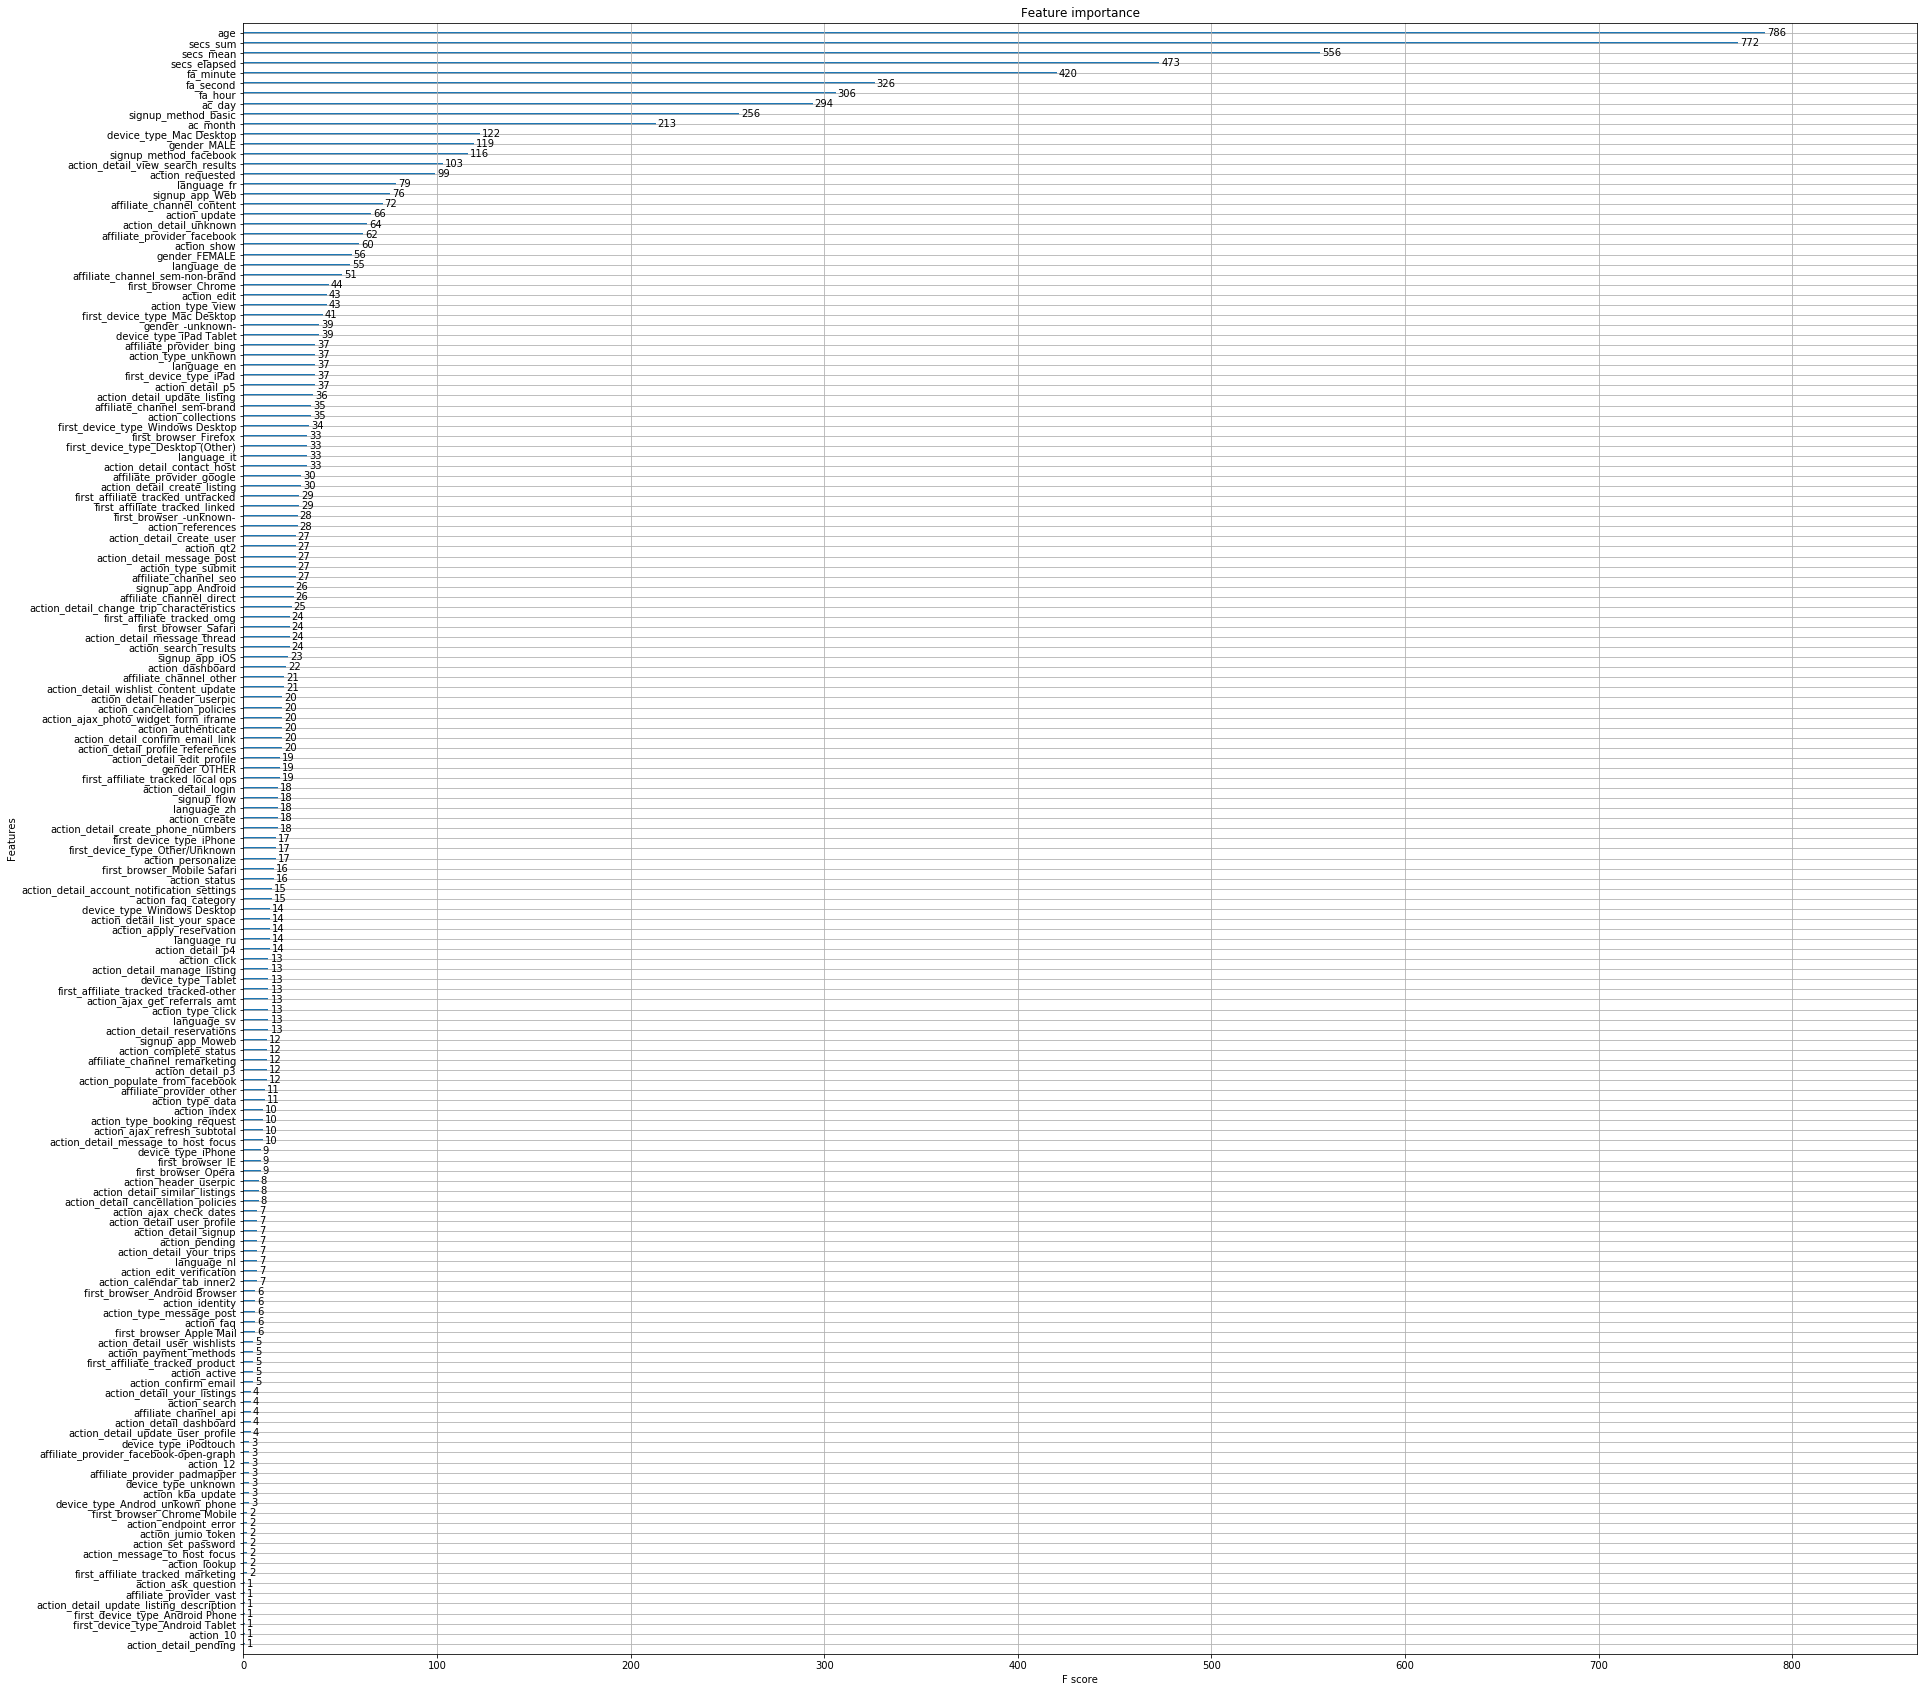

In [46]:
fig, ax = plt.subplots(figsize = (30, 30))
plot_importance(xgb1, ax= ax)

In [100]:
y_pre = xgb1.predict(X)
print(classification_report(y, y_pre))

             precision    recall  f1-score   support

         AU       0.00      0.00      0.00       121
         CA       0.00      0.00      0.00       335
         DE       1.00      0.01      0.03       204
         ES       0.00      0.00      0.00       525
         FR       0.00      0.00      0.00      1057
         GB       0.00      0.00      0.00       552
         IT       1.00      0.00      0.01       673
        NDF       0.64      0.66      0.65     18867
         NL       0.00      0.00      0.00       194
         PT       0.00      0.00      0.00        49
         US       0.52      0.70      0.59     16283
      other       0.00      0.00      0.00      2707

avg / total       0.52      0.58      0.53     41567



/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [120]:
print(confusion_matrix(y, y_pre))

[[    0     0     0     0     0     0     0    35     0     0    86     0]
 [    0     0     0     0     0     0     0   100     0     0   235     0]
 [    0     0     3     0     0     0     0    72     0     0   129     0]
 [    0     0     0     0     0     0     0   178     0     0   347     0]
 [    0     0     0     0     0     0     0   358     0     0   699     0]
 [    0     0     0     0     0     0     0   155     0     0   397     0]
 [    0     0     0     0     0     0     3   189     0     0   481     0]
 [    0     0     0     0     0     0     0 12542     0     0  6325     0]
 [    0     0     0     0     0     0     0    61     0     0   133     0]
 [    0     0     0     0     0     0     0    20     0     0    29     0]
 [    0     0     0     0     0     0     0  4898     0     0 11385     0]
 [    0     0     0     0     0     0     0   889     0     0  1818     0]]


### 2. 2 class (NDF, DF)

In [50]:
y_2 = y.apply(lambda x : "NDF" if (x=="NDF") else "DF")

In [52]:
xgb2 = XGBClassifier(n_jobs = 4)

In [53]:
xgb2.fit(X, y_2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=4, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

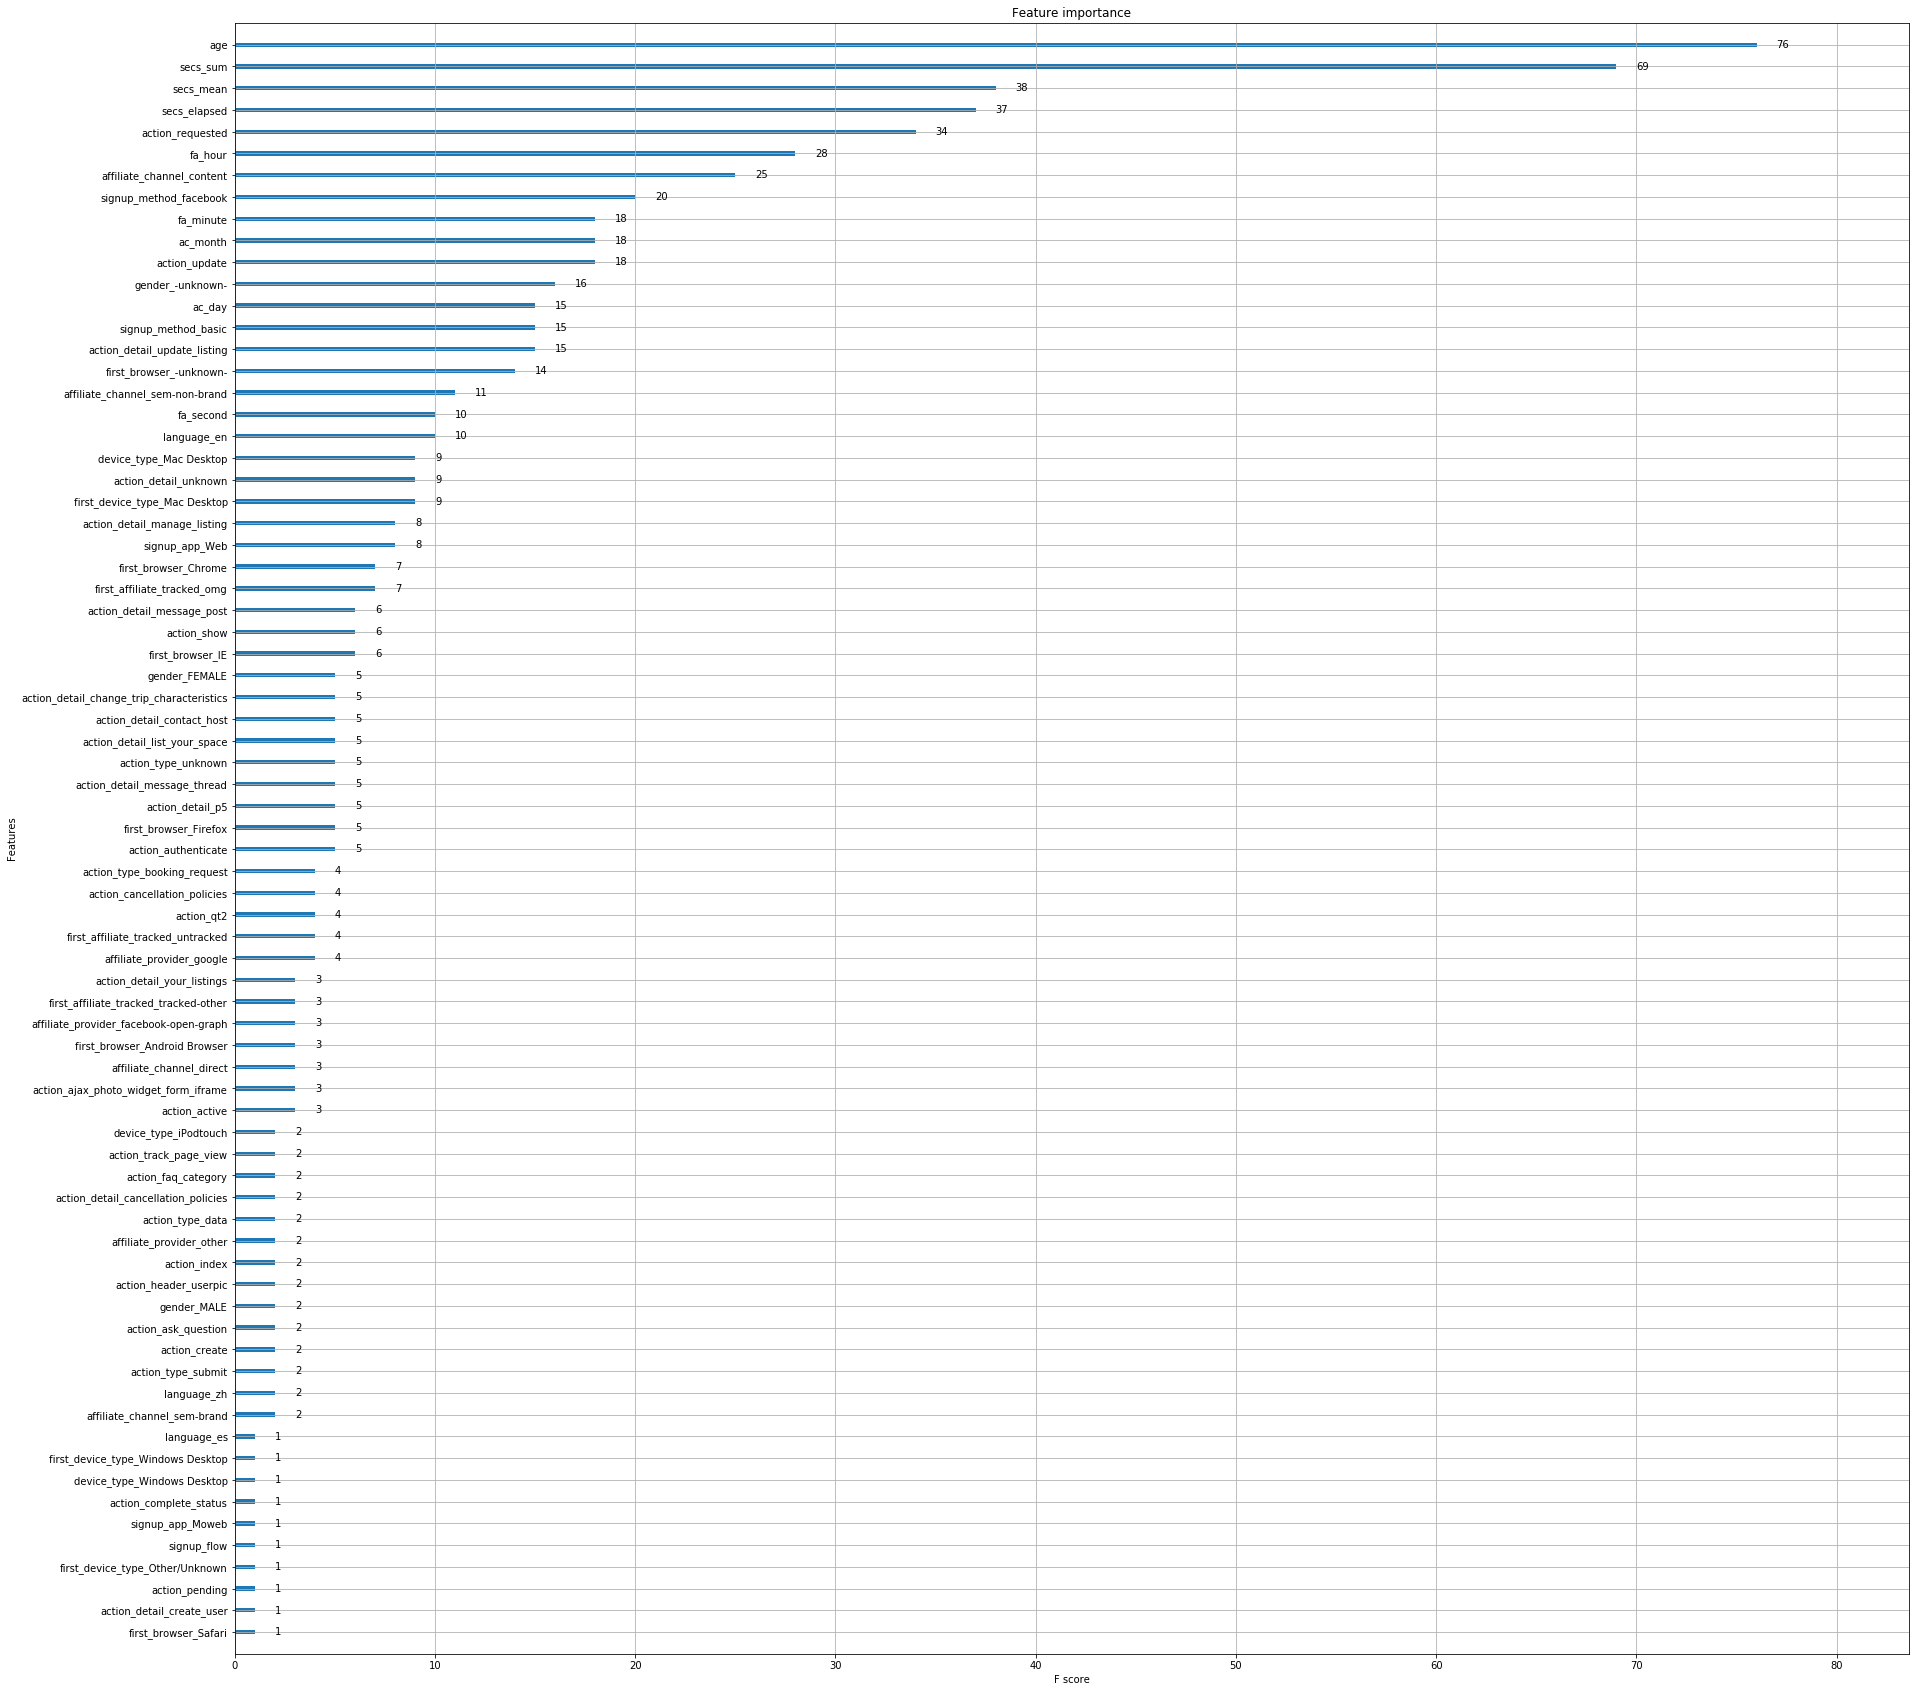

In [54]:
fig, ax = plt.subplots(figsize = (30, 30))
plot_importance(xgb2, ax= ax)

In [101]:
y_2_pre = xgb2.predict(X)
print(classification_report(y_2, y_2_pre))

             precision    recall  f1-score   support

         DF       0.69      0.79      0.74     22700
        NDF       0.69      0.57      0.63     18867

avg / total       0.69      0.69      0.69     41567



In [119]:
print(confusion_matrix(y_2, y_2_pre))

[[17944  4756]
 [ 8128 10739]]


### 3. 11 class (other, 10개 나라)

In [65]:
idx_df = np.in1d(y_2, "DF")

In [66]:
y_3 = y[idx_df]
X_3 = X[idx_df]

In [67]:
y_3.shape, X_3.shape

((22700,), (22700, 347))

In [69]:
xgb3 = XGBClassifier(n_jobs = 4)

In [70]:
xgb3.fit(X_3, y_3)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=4, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

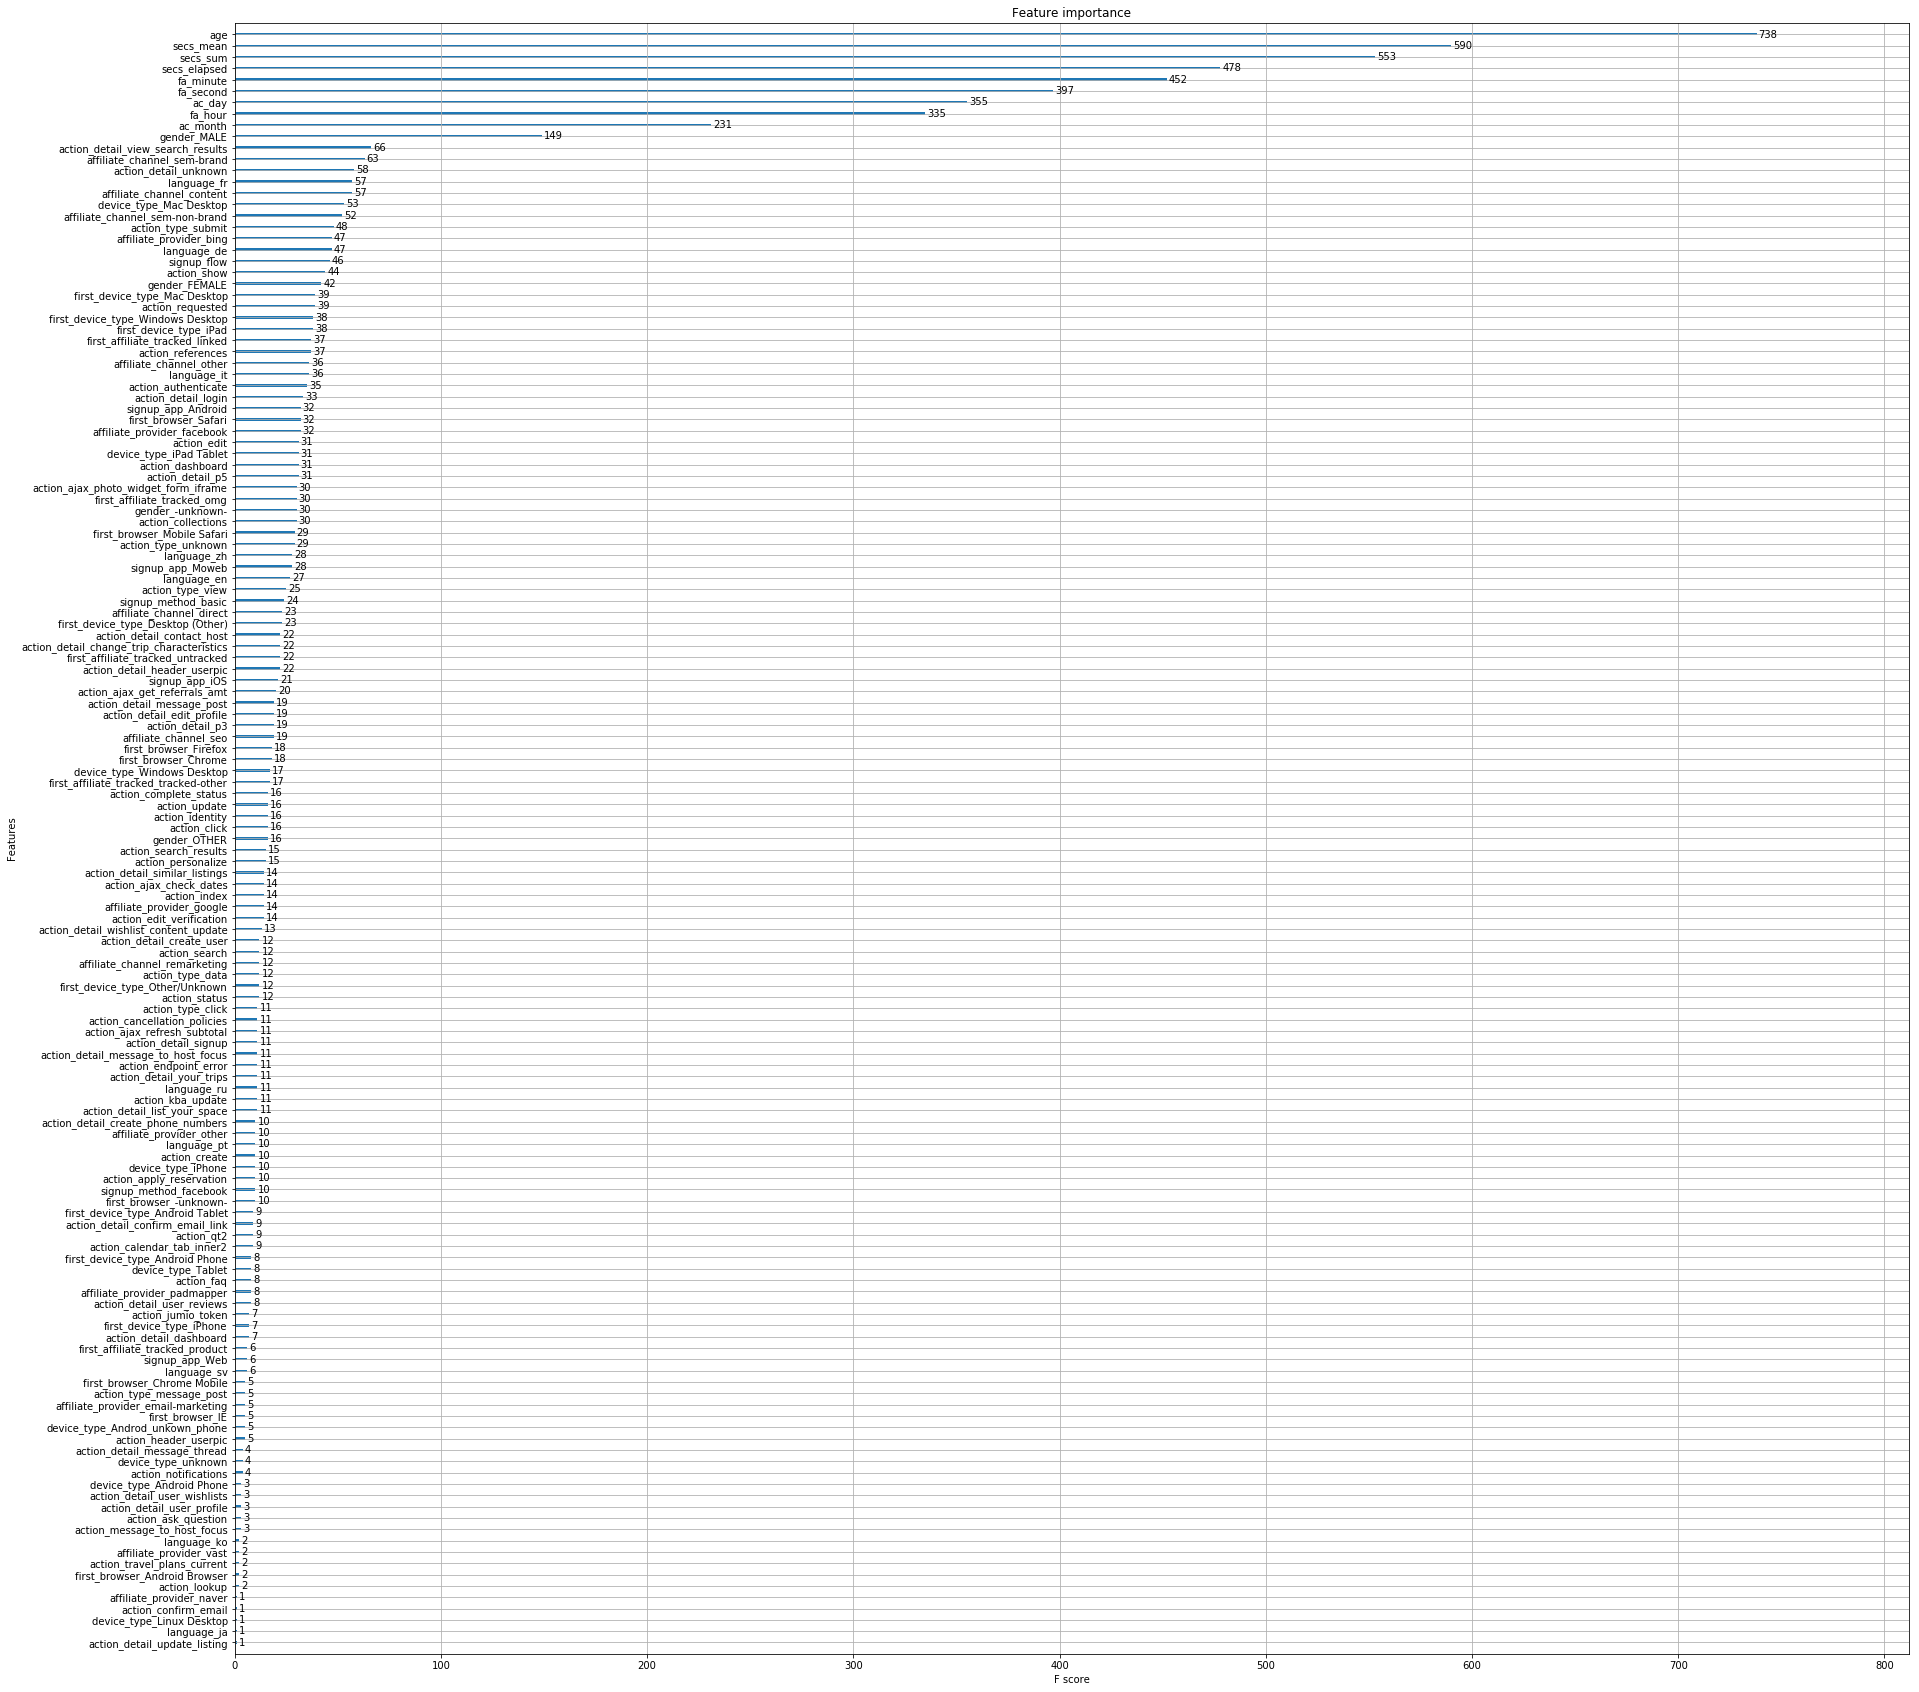

In [85]:
fig, ax = plt.subplots(figsize = (30, 30))
plot_importance(xgb3, ax= ax)

In [102]:
y_3_pre = xgb3.predict(X_3)
print(classification_report(y_3, y_3_pre))

             precision    recall  f1-score   support

         AU       0.00      0.00      0.00       121
         CA       0.00      0.00      0.00       335
         DE       1.00      0.01      0.02       204
         ES       0.00      0.00      0.00       525
         FR       1.00      0.00      0.00      1057
         GB       0.00      0.00      0.00       552
         IT       1.00      0.01      0.02       673
         NL       0.00      0.00      0.00       194
         PT       1.00      0.02      0.04        49
         US       0.72      1.00      0.84     16283
      other       1.00      0.00      0.00      2707

avg / total       0.72      0.72      0.60     22700



/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [118]:
print(confusion_matrix(y_3, y_3_pre))

[[    0     0     0     0     0     0     0     0     0   121     0]
 [    0     0     0     0     0     0     0     0     0   335     0]
 [    0     0     2     0     0     0     0     0     0   202     0]
 [    0     0     0     0     0     0     0     0     0   525     0]
 [    0     0     0     0     1     0     0     0     0  1056     0]
 [    0     0     0     0     0     0     0     0     0   552     0]
 [    0     0     0     0     0     0     7     0     0   666     0]
 [    0     0     0     0     0     0     0     0     0   194     0]
 [    0     0     0     0     0     0     0     0     1    48     0]
 [    0     0     0     0     0     0     0     0     0 16283     0]
 [    0     0     0     0     0     0     0     0     0  2706     1]]


### 4. 10 class (other, 9개 나라 미국 제외)

In [80]:
idx_4 = np.logical_not(np.in1d(y_3, "US"))

In [81]:
y_4 = y_3[idx_4]
X_4 = X_3[idx_4]

In [82]:
y_4.shape, X_4.shape

((6417,), (6417, 347))

In [83]:
xgb4 = XGBClassifier(n_jobs = 4)

In [84]:
xgb4.fit(X_4, y_4)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=4, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

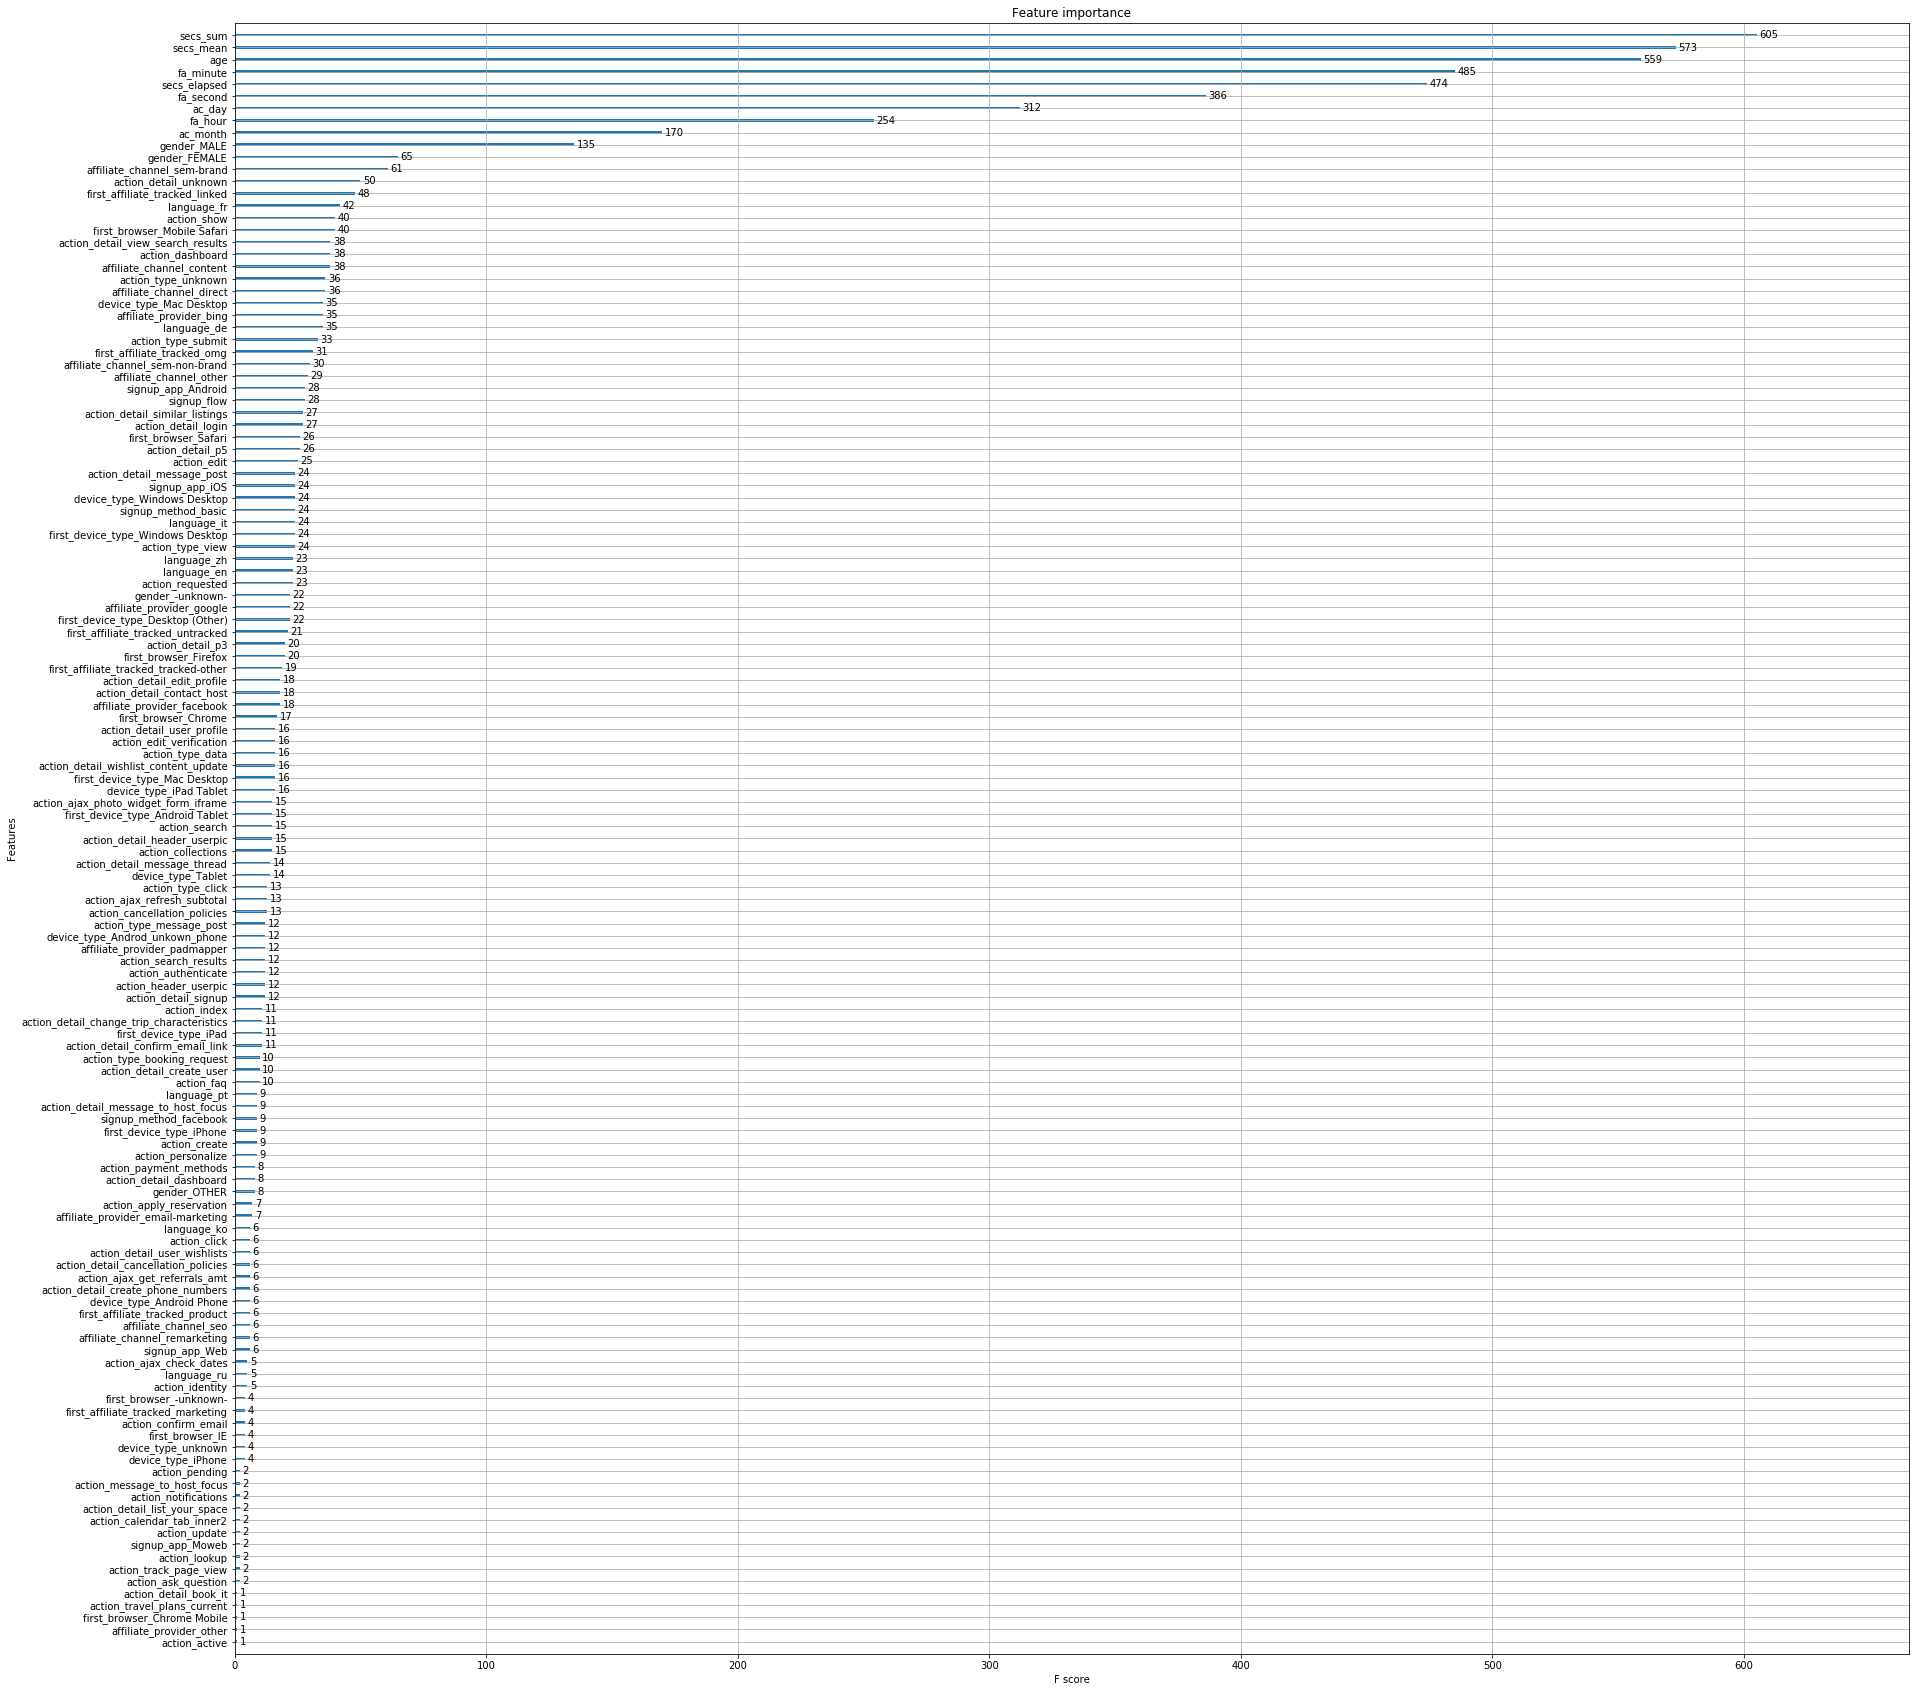

In [86]:
fig, ax = plt.subplots(figsize = (30, 30))
plot_importance(xgb4, ax= ax)

In [103]:
y_4_pre = xgb4.predict(X_4)
print(classification_report(y_4, y_4_pre))

             precision    recall  f1-score   support

         AU       0.00      0.00      0.00       121
         CA       1.00      0.02      0.05       335
         DE       1.00      0.04      0.08       204
         ES       0.86      0.01      0.02       525
         FR       0.72      0.07      0.14      1057
         GB       1.00      0.01      0.01       552
         IT       1.00      0.02      0.04       673
         NL       0.00      0.00      0.00       194
         PT       1.00      0.02      0.04        49
      other       0.43      1.00      0.60      2707

avg / total       0.65      0.44      0.29      6417



/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [117]:
print(confusion_matrix(y_4, y_4_pre))

[[   0    0    0    0    0    0    0    0    0  121]
 [   0    8    0    0    3    0    0    0    0  324]
 [   0    0    8    0    7    0    0    0    0  189]
 [   0    0    0    6    7    0    0    0    0  512]
 [   0    0    0    1   79    0    0    0    0  977]
 [   0    0    0    0    6    4    0    0    0  542]
 [   0    0    0    0    1    0   14    0    0  658]
 [   0    0    0    0    2    0    0    0    0  192]
 [   0    0    0    0    2    0    0    0    1   46]
 [   0    0    0    0    3    0    0    0    0 2704]]


### 5. 9 class (9개 나라 미국 제외)

In [88]:
idx_5 = np.logical_not(np.in1d(y_4, "other"))

In [90]:
y_5 = y_4[idx_5]
X_5 = X_4[idx_5]

In [91]:
y_5.shape, X_5.shape

((3710,), (3710, 347))

In [92]:
xgb5 = XGBClassifier(n_jobs = 4)

In [93]:
xgb5.fit(X_5, y_5)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=4, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

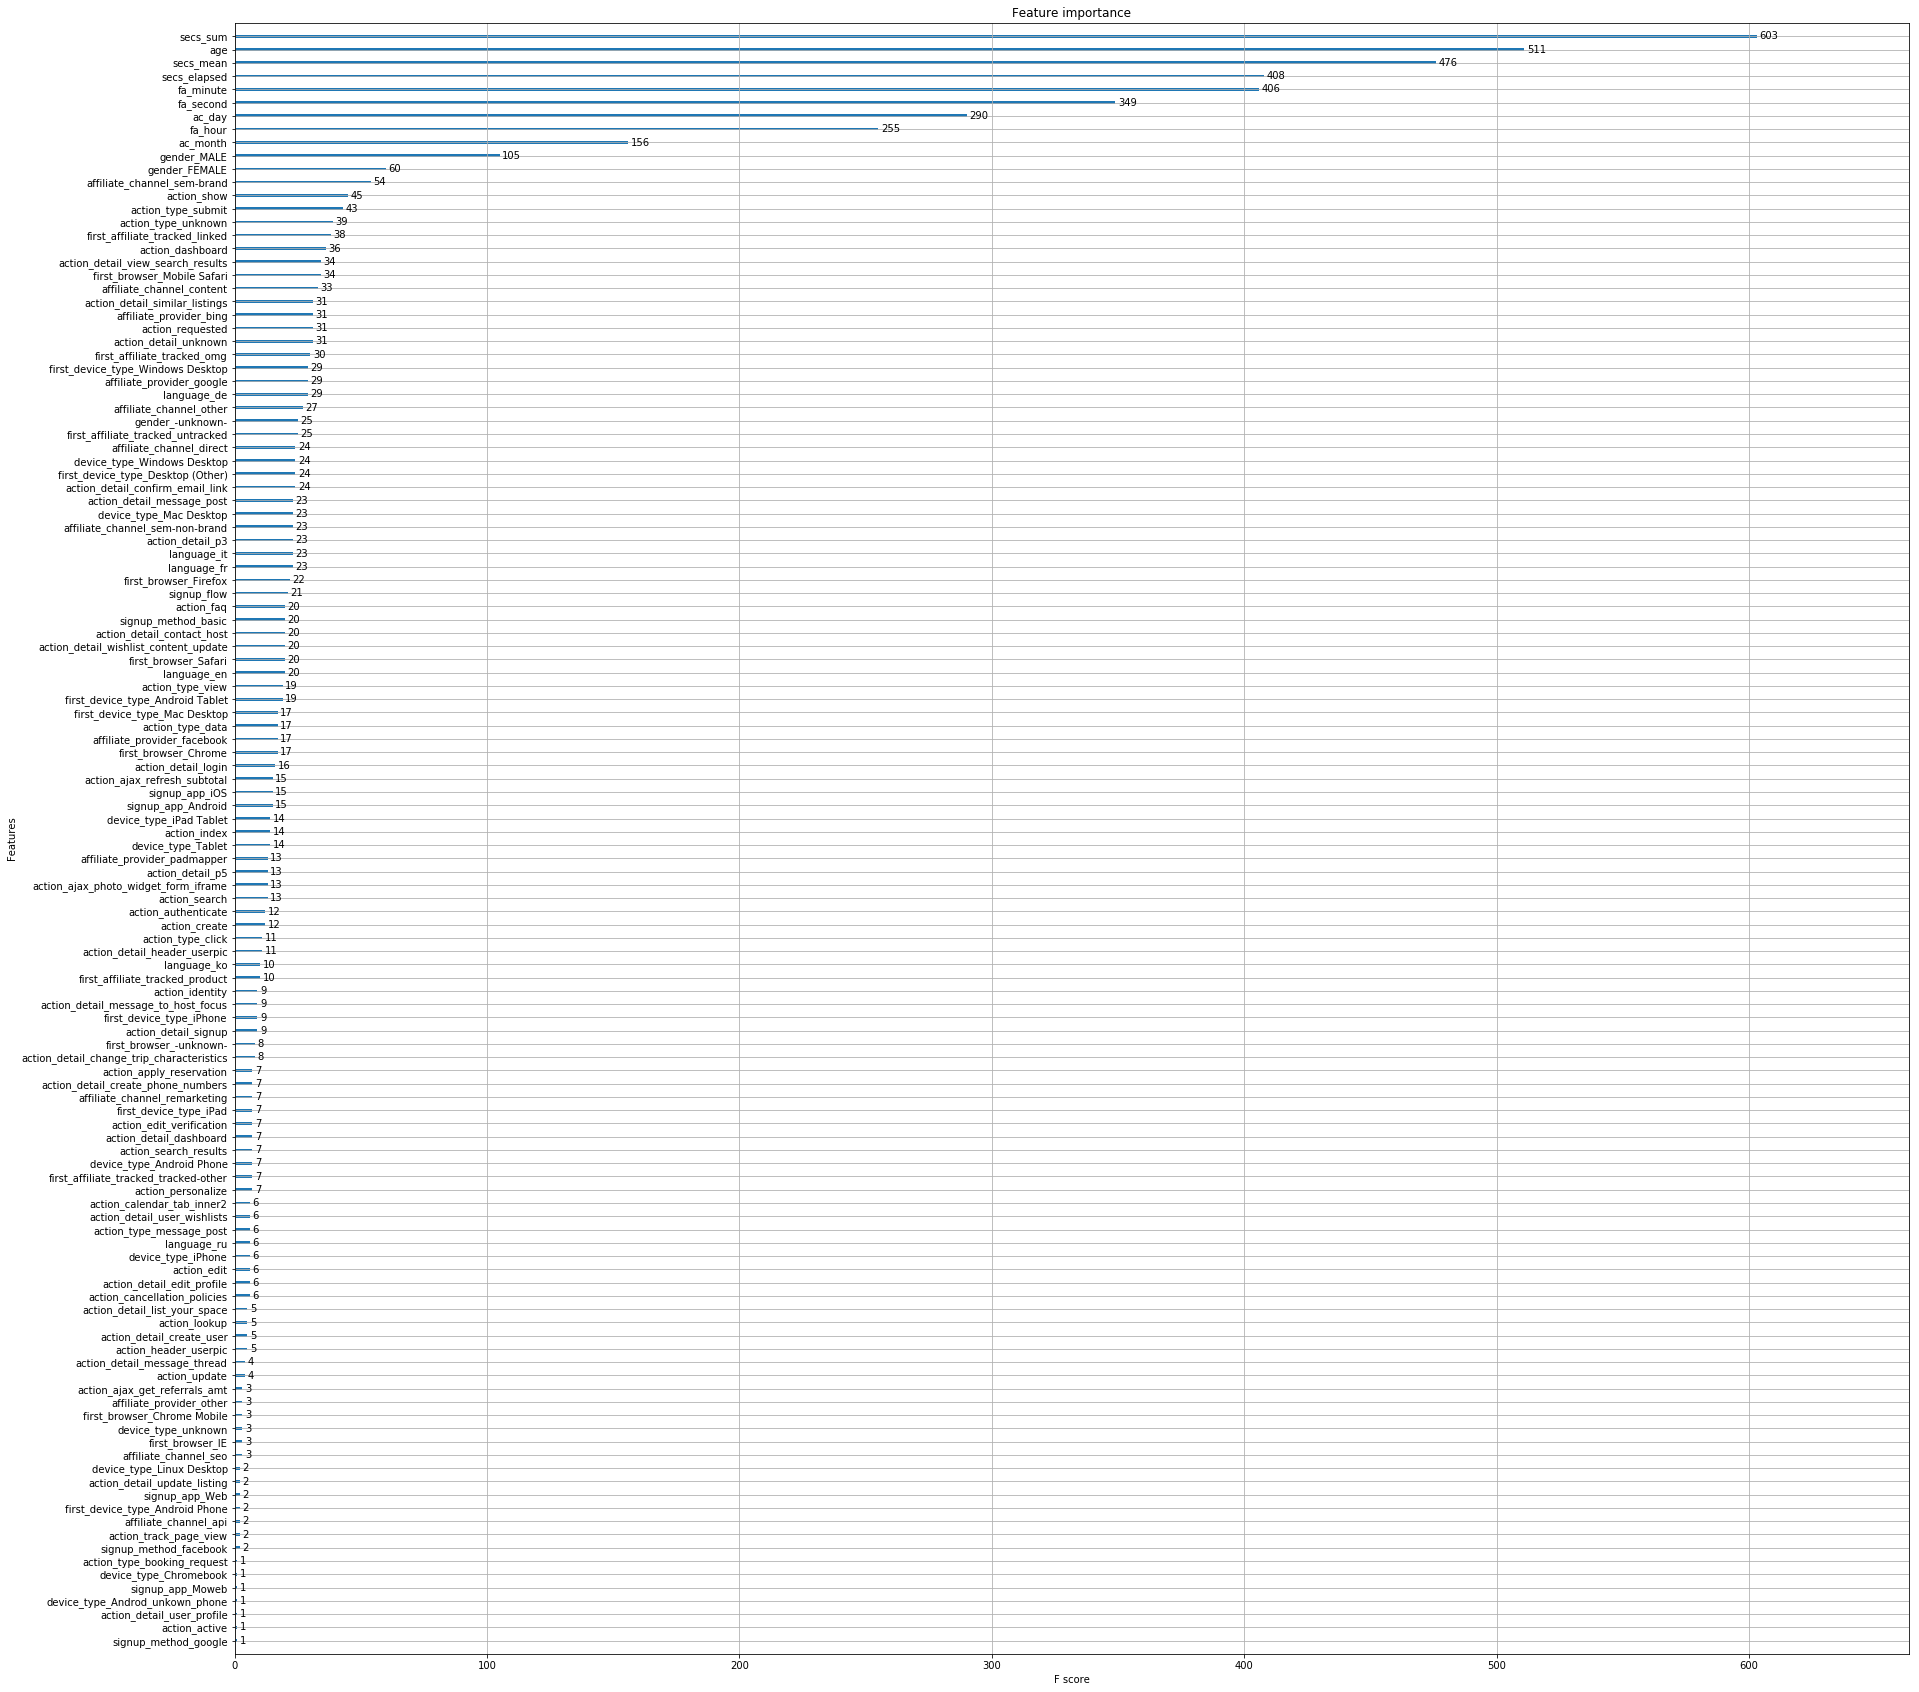

In [94]:
fig, ax = plt.subplots(figsize = (30, 30))
plot_importance(xgb5, ax= ax)

In [115]:
y_5_pre = xgb5.predict(X_5)
print(classification_report(y_5, y_5_pre))

             precision    recall  f1-score   support

         AU       1.00      0.08      0.15       121
         CA       0.93      0.12      0.21       335
         DE       0.92      0.11      0.19       204
         ES       0.66      0.14      0.23       525
         FR       0.33      0.96      0.50      1057
         GB       0.63      0.14      0.23       552
         IT       0.51      0.28      0.36       673
         NL       0.89      0.04      0.08       194
         PT       1.00      0.14      0.25        49

avg / total       0.60      0.39      0.31      3710



In [116]:
print(confusion_matrix(y_5, y_5_pre))

[[  10    0    0    2   93    4   12    0    0]
 [   0   39    0    5  258    9   24    0    0]
 [   0    1   22    3  162    2   14    0    0]
 [   0    0    0   72  417    6   30    0    0]
 [   0    0    1    7 1010    3   36    0    0]
 [   0    0    0    5  436   76   35    0    0]
 [   0    2    1    7  462   11  189    1    0]
 [   0    0    0    8  152    6   20    8    0]
 [   0    0    0    0   31    4    7    0    7]]
